In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models, datasets
import matplotlib.pyplot as plt
import numpy as np

In [2]:
(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 8s 0us/step


In [3]:
print("Shape of Training Set", X_train.shape)
print("Shape of Test Set", X_test.shape)

Shape of Training Set (50000, 32, 32, 3)
Shape of Test Set (10000, 32, 32, 3)


In [4]:
print("Shape of Training Labels ", y_train.shape)
print("Shape of Test Labels ", y_test.shape)

Shape of Training Labels  (50000, 1)
Shape of Test Labels  (10000, 1)


In [8]:
y_train[500:505]

array([[5],
       [8],
       [2],
       [8],
       [0]], dtype=uint8)

In [10]:
y_train = y_train.reshape(-1,)
y_train[500:505]

array([5, 8, 2, 8, 0], dtype=uint8)

In [12]:
y_test = y_test.reshape(-1,)

In [13]:
classes = ["Airplane", "Automobile", "Bird", "Cat", "Deer", "Dog", "Frog", "Horse", "Ship", "Truck"]

In [18]:
def plot_img(X,y, ind):
  plt.figure(figsize=(10,1))
  plt.imshow(X[ind])
  plt.xlabel(classes[y[ind]])

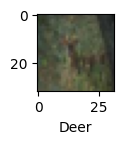

In [19]:
plot_img(X_train, y_train, 10)

In [20]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [22]:
ann = models.Sequential([
    layers.Flatten(input_shape=(32,32,3)),
    layers.Dense(3000, activation='relu'),
    layers.Dense(1000, activation='relu'),
    layers.Dense(10, activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [23]:
ann. compile(optimizer='SGD', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [24]:
ann.fit(X_train, y_train, epochs=100)

Epoch 1/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.3057 - loss: 1.9325
Epoch 2/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.4198 - loss: 1.6391
Epoch 3/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.4543 - loss: 1.5479
Epoch 4/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.4745 - loss: 1.4874
Epoch 5/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.4969 - loss: 1.4302
Epoch 6/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.5074 - loss: 1.4002
Epoch 7/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.5271 - loss: 1.3508
Epoch 8/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.5370 - loss: 1.3089
Epoch 9/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.5478 - loss: 1.2830
Epoch 10/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.5637 - loss: 1.2509
Epoch 11/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.5707 - loss: 1.2199
Epoch 12/100
15

In [25]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [27]:
y_pred = ann.predict(X_test)
y_pred

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


array([[1.6597384e-06, 9.3140017e-07, 6.0957717e-04, ..., 1.6764722e-10,
        7.4526797e-05, 1.2084803e-05],
       [4.0537252e-08, 4.5000394e-05, 8.8565608e-09, ..., 2.3696174e-09,
        9.9979526e-01, 1.5974563e-04],
       [6.5962118e-01, 5.0721448e-03, 1.6965378e-04, ..., 1.7338730e-03,
        3.1366250e-01, 1.9736428e-02],
       ...,
       [1.0302517e-05, 1.8727079e-08, 4.1054673e-02, ..., 4.8206130e-04,
        1.6374116e-04, 1.0518046e-05],
       [1.7808630e-03, 1.9982980e-04, 2.5047487e-01, ..., 3.9226055e-05,
        2.6541866e-06, 2.3834875e-06],
       [7.7875001e-08, 1.0609009e-06, 1.7226653e-02, ..., 8.9965838e-01,
        7.7433560e-06, 5.1531811e-06]], dtype=float32)